Trong trường hợp này sử dụng Deep Learning, các mô hình CNN (Convolutional Neural Network) sẽ được sử dụng để tự động học các đặc trưng của hình ảnh và xây dựng mô hình phân loại. Việc sử dụng Deep Learning cho phép mô hình học được các đặc trưng phức tạp của hình ảnh một cách tự động, giúp cải thiện độ chính xác và khả năng tổng quát hóa của mô hình.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [2]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/Colab Notebooks/data/dataset.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [3]:
path = '/content/dataset/training_set'
classes = os.listdir(path)
classes


['cats', 'dogs']

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dataset/training_set/cats')
dog_dir = os.path.join('/content/dataset/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 10

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [5]:
base_dir = '/content/dataset/training_set'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [6]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

Mô hình này sử dụng một mạng CNN với nhiều lớp Conv2D và MaxPooling2D để trích xuất các đặc trưng từ ảnh đầu vào, sau đó sử dụng các lớp Dense và BatchNormalization để học các mối quan hệ phức tạp giữa các đặc trưng và cuối cùng đưa ra dự đoán xác suất cho các lớp đầu ra.

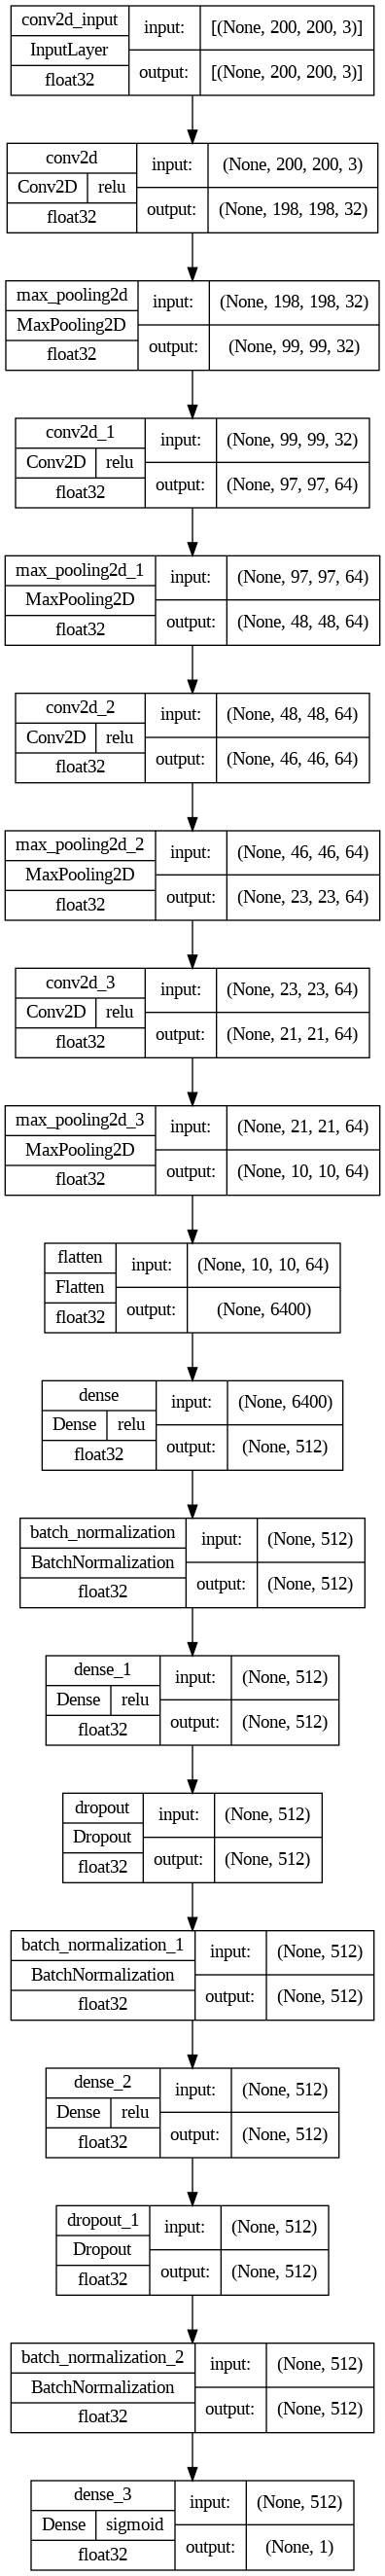

In [8]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
225/225 [==============================] - 27s 60ms/step - loss: 0.7655 - accuracy: 0.5714 - val_loss: 1.0125 - val_accuracy: 0.5163
Epoch 2/10
225/225 [==============================] - 14s 59ms/step - loss: 0.6800 - accuracy: 0.6065 - val_loss: 0.7648 - val_accuracy: 0.5525
Epoch 3/10
225/225 [==============================] - 19s 84ms/step - loss: 0.6404 - accuracy: 0.6472 - val_loss: 1.0993 - val_accuracy: 0.4988
Epoch 4/10
225/225 [==============================] - 15s 63ms/step - loss: 0.5857 - accuracy: 0.6976 - val_loss: 2.2066 - val_accuracy: 0.4950
Epoch 5/10
225/225 [==============================] - 14s 60ms/step - loss: 0.5437 - accuracy: 0.7294 - val_loss: 0.8853 - val_accuracy: 0.5238
Epoch 6/10
225/225 [==============================] - 14s 60ms/step - loss: 0.5555 - accuracy: 0.7208 - val_loss: 0.6091 - val_accuracy: 0.6925
Epoch 7/10
225/225 [==============================] - 13s 59ms/step - loss: 0.4843 - accuracy: 0.7722 - val_loss: 0.4834 - val_accuracy:

Với biểu đồ hiển thị giá trị của hàm mất mát (loss), chúng ta muốn giảm giá trị của hàm mất mát qua từng epoch để đạt được một mô hình chất lượng tốt. Nếu giá trị của hàm mất mát giảm qua mỗi epoch thì đây là dấu hiệu của việc mô hình đang học được từ dữ liệu huấn luyện.

Với biểu đồ hiển thị giá trị của độ chính xác (accuracy), chúng ta muốn tăng độ chính xác của mô hình qua từng epoch để đạt được một mô hình chất lượng tốt. Nếu giá trị của độ chính xác tăng qua mỗi epoch thì đây là dấu hiệu của việc mô hình đang học được từ dữ liệu huấn luyện.

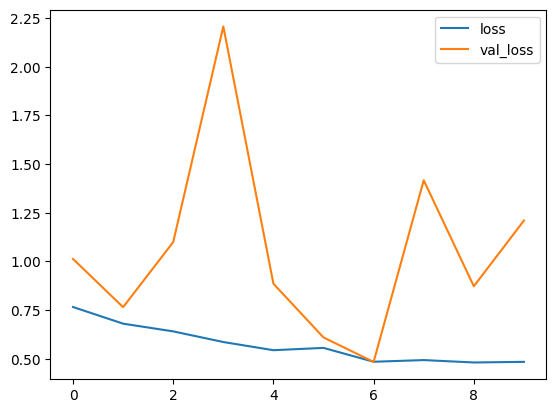

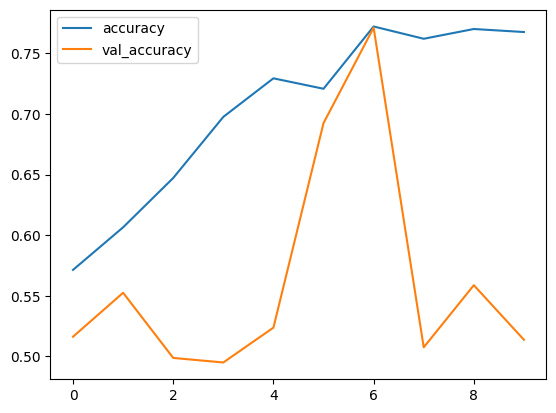

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 20ms/step
Cat


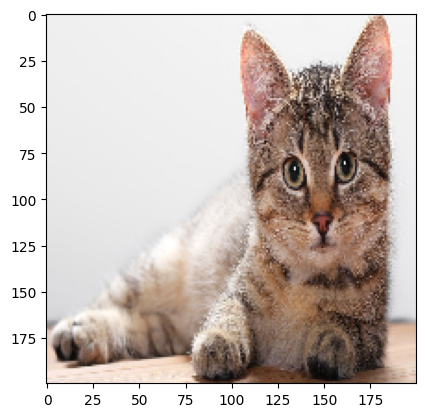

In [14]:
import keras.utils as image
  
#Input image
test_image = image.load_img('/content/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(200,200))
  
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

Lưu model

In [15]:
import os

# Đường dẫn đến thư mục chứa model trên Google Drive
model_dir = '/content/drive/MyDrive/Colab Notebooks/model-trained'

# Tạo thư mục nếu chưa tồn tại
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
# Lưu model vào file trong thư mục model_dir
model.save(os.path.join(model_dir, 'my_model.h5'))
